In [1]:
# フィッシャーの三原則

# 「実験計画法」とは、取り上げる対象についての結果とそれに影響しそうな要因との関係を調べるために、
# 時間面、経済面などの制約を考慮しながら計画的な実験によりデータを得て、それらを解析し有益な情報を見出す一連の方法である。
# また、分散分析はデータから実験で取り上げた変数の効果の有無の検定に用いる。
# 物理、化学などの科学的な精密さを求める実験では結果のばらつきの低減を目指すのに対し、
# 数理統計学の力により種々の推論を行う
# 結果とその要因の関係を定量的に推定するために、まず、結果を表現する指標を「応答」として設定する
# これを「特性」と呼ぶこともある。応答に影響を及ぼすと思われる変数の中で、実験で取り上げるものを「因子」、
# 「因子」について具体的な条件を「水準」とよぶ。さらに、複数因子の水準によって決まるそれぞれの実験を「処理」とよぶこともある。
# 実験計画法の起源は、フィッシャーによる農場試験への適用である。
# 農場試験では結果に影響を与える変数が複数存在する。また、これらの条件を一定に保つことは現実的に不可能なので、
# 実験結果にばらつきが生じるので、このばらつきの中で条件をの中から良いものを見出す必要がある。
# これらを背景に、フィッシャーは次の実験の3原則を示している。
# (1)反復、繰り返し：誤差による変動の評価を可能にする。偶然誤差or系統誤差の判別
# (2)ランダム化：実験による変動以外を確率的な誤差に転化する
# (3)局所管理：実験場全体での均一化が困難な場合に、局所的に均一な実験環境を準備

In [9]:
# 1元配置

# データ解析に際し、第i水準、第j繰り返しでのデータのyijについて、
# yij~N(μ(Ai), σ**2) とする(i=1,..,n)。このモデルは、因子Aの水準iによって平均μ(Ai)が決まり、
# Aiによらず共通の分散をもつ誤差を伴い測定していることを表す
# 平均μ(Ai)を水準について平均化したμ=Σμ(Ai)/aを一般平均と呼ぶ
# 因子の効果をai=μ(Ai)-μのとおり一般平均の差とすると、上記のyijは次式となる
# yij = μ+ai+εij, εij~N(0, σ**2)
# 効果に対する帰無仮説、対立仮説は、H0:a1=..=aα=0 vs H1:"="が少なくとも一つは成り立たない 
# であり、この検定には「分散分析」を用いる。
# 応答yについて、全体の平均値y_barからの偏差について二乗和をとり、「総平方和」STを
# ST = ΣΣ(yij-y_bar)**2 とする。なお、この自由度ΦTはan-1である
# 次に因子Aの「水準間平方和」SAを
# SA = ΣΣ(yAi_bar-y_bar)**2 = n*Σ(yA_bar-y_bar)**2 とする
# 水準ごとの平均yA1_bar,..,yAa_barのばらつきが大きいほどSAが大きくなる。
# また、この平方和の自由度ΦAはa-1となる
# さらに「誤差平方和」SEは、第i水準での誤差平方和は次式とする
# SE = ΣΣ(yij-yAi_bar)**2
# この自由度はΦEはa*(n-1)である。なお誤差平方和は「残差平方和」とよぶ場合もある。
# 平方和SA,SEを自由度ΦA,ΦEで除し、水準間の変動VA=SA/ΦA、誤差による変動VE=SE/ΦEを求める
# これらを分散、あるいは、「平均平方」とよぶ
# 帰無仮説H0が成り立つ場合には、F=VA/VE が自由度(ΦA,ΦE)のF分布に従う。
# これから分散分析表の通りF値を求め、パーセント点と比較することで検定を行う

import numpy as np
from scipy.stats import f

# 実験結果(繰り返しj:3〜5回)
Y = [
    [15, 13, 15, 16, 14],  # 水準i=1
    [18, 17, 16, 15, 18],  # 水準i=2
    [19, 16, 17, 18],      # 水準i=3
    [17, 15, 16]           # 水準i=4
]

# データ全体の平均値を求める
n_instances = 0
total = 0
for y_A in Y:
    n_instances += len(y_A)
    total += sum(y_A)
total_mean = total / n_instances
print(f"データの個数:{n_instances}, データ全体の平均値:{total_mean:.3f}")

# 総平方和を求める
S_T = 0
for i, y_A in enumerate(Y):
    for j in range(len(y_A)):
        S_T += (Y[i][j] - total_mean)**2
print(f"ST:{S_T:.3f}")

# 水準間平方和を求める
means = []
for y_A in Y:
    mean_A = sum(y_A)/len(y_A)
    means.append(mean_A)
S_A = 0
for i, mean_A in enumerate(means):
    S_A += (mean_A - total_mean)**2 * len(Y[i])
print(f"SA:{S_A:.3f}")

# 誤差平方和を求める
S_E = S_T - S_A
print(f"SE:{S_E:.3f}")

# 自由度を求める
phi_T = n_instances - 1
phi_A = len(Y) - 1
phi_E = phi_T - phi_A
print(f"自由度ΦT:{phi_T}, ΦA:{phi_A}, ΦE:{phi_E}")

# F統計量を求める
V_A = S_A / phi_A
V_E = S_E / phi_E
F = V_A / V_E
print(f"F統計量:{F:.3f}")

# F分布から棄却域を決定する
f_distribution = f(phi_A, phi_E)
print(f"95%点:{f_distribution.ppf(0.95):.3f}") # F≥3.411のため帰無仮説は棄却

データの個数:17, データ全体の平均値:16.176
ST:40.471
SA:21.471
SE:19.000
自由度ΦT:16, ΦA:3, ΦE:13
F統計量:4.897
95%点:3.411


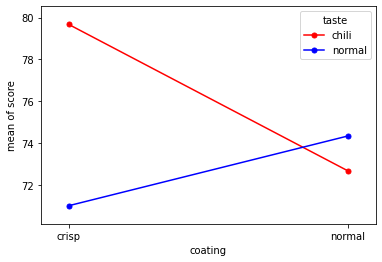

In [14]:
# 2元配置

# 因子A,Bについて、水準Ai(i=1,..,a), 水準Bj(j=1,..,b)による組み合わせのそれぞれでn回、
# 全部でa*b*n回の実験をランダムに実施する計画を「2元配置」、2因子要因計画とよぶ。
# 因子A,Bの「主効果」ai,bjと「交互作用」(ab)ijを含む次のモデルを用いる
# yijk = μ + ai + bi +(ab)ij + εijk
# 交互作用とは複数因子の相乗的な効果を表し、1つの因子の効果がほかの因子の水準によって異なる度合いを示す
# 主効果、交互作用の有無は、分散分析により検定する

# stasmodelsを活用して実行
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot

# ハンバーガーについて、「味付け」が普通/辛口の２水準、「食感」が普通/クリスピーの２水準の評価データを作成
taste = 2*(['chili' for _ in range(15)] + ['normal' for _ in range(15)])
coating = ['crisp' for _ in range(30)] + ['normal' for _ in range(30)]
hamburger_df = pd.DataFrame({'taste': taste, 'coating': coating,
'score': [65,85,75,85,75,80,90,75,85,65,75,85,80,85,90,
          65,70,80,75,70,60,65,70,85,60,65,75,70,80,75,
          70,65,85,80,75,65,75,60,85,65,75,70,65,80,75,
          70,70,85,80,65,75,65,85,80,60,70,75,70,80,85]})
hamburger_df.groupby(['coating', 'taste']).describe().round(2)

# 交互作用の確認
fig = interaction_plot(hamburger_df.coating, 
    hamburger_df.taste, 
    hamburger_df.score, 
    colors=['red', 'blue'], ms=10) # crisp * chiliの組み合わせは良い


In [15]:
# 2元配置分散分析の実行
twoway_anova = smf.ols(formula='score ~ coating + taste + coating*taste', data=hamburger_df).fit()
sm.stats.anova_lm(twoway_anova, typ=2).round(2)

# 分散分析表より
# coating（食感）による違いは有意差なし
# taste（味付け）による違いは有意差なし
# 交互作用による違いは有意差あり

,sum_sq,df,F,PR(>F)
coating,50.42,1.0,0.84,0.36
taste,183.75,1.0,3.05,0.09
coating:taste,400.42,1.0,6.65,0.01
Residual,3370.00,56.0,NaN,NaN


In [16]:
# 乱塊法:ブロック因子の導入

# 応答に影響を与えるがその効果に興味がないものをブロック因子と呼ぶ
# また、ブロック因子を導入する実験計画を「乱塊法」とよぶ
# フィッシャーの局所管理の原則に基づきブロック因子の影響を取り除くと、他の因子の効果が検出されやすくなる

In [16]:
# 直行表による一部実施要因計画

# 複数因子のすべての水準組み合わせを実施する計画を要要因計画と、
# また、その一部を実施する計画を「一部実施要因計画」と呼ぶ。
# 一部実施要因計画を実施するためのテンプレートが「直交表」である。
# 直交表を用いて実験を行うには、直行表の列に因子を対応させて実験の水準組み合わせを
# 決める必要がある。このことを直行表の列に対する因子の「割付け」とよぶ